# 1.Linear regression

## 1.1 Linear regression with one variable
In this part of this exercise, you will implement **linear regression** with **one variable** to **predict profits** for a food truck. 

Suppose you are the CEO of a restaurant franchise and *are considering different cities for opening a new outlet*. 
The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next.

The file *ex1data1.txt* contains the dataset for our linear regression problem.
**The first column is the population of a city and the second column is the profit of a food truck in that city. 
A negative value for profit indicates a loss.**

### 1.1.1 Plotting the Data
Before starting on any task, it is often useful to understand the data by visualizing it.

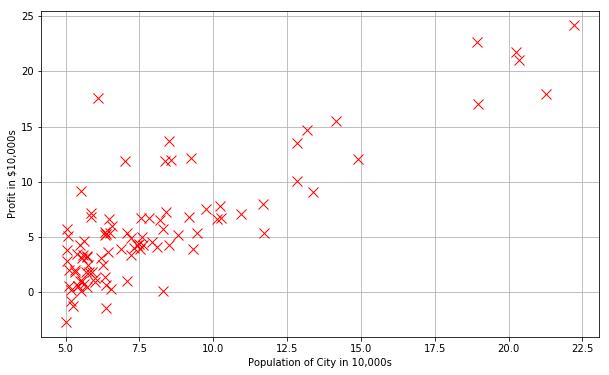

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

datafile = 'data/ex1data1.txt'
cols = np.loadtxt(datafile,delimiter=',',unpack = 'True') 
#print cols[:1]
#print cols[-1:]
X = cols[:1]
y = cols[-1:]


plt.figure(figsize=(10,6))
plt.plot(X,y,'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')


### 1.1.2 Gradient Descent
Fit the linear regression parameters θ to our dataset using gradient descent

The objective of linear regression is to minimize the cost function
$$J(\theta)=\frac{1}{2m} \sum_{i= 1}^{m}( h_{\theta}( x^{(i)}) - y^{(i)})^2$$
the hypothesis hθ(x) is given by the linear model
$$h_{\theta}(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}$$





In [65]:
# 数据准备
m = y.size
X = np.array(X).reshape(m,1)
y = np.array(y).reshape(m,1)
Xones = np.ones((m,1))
X = np.hstack((Xones,X))


In [67]:
# 函数方程准备
def h(theta,X):               # Linear hypothesis function h(x)
    return np.dot(X,theta)    # 点乘 一维就是乘完求和 x0 的值是1 即 theta0 + theta1 * x1


def computeCost(mytheta,X,y): #Cost function
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

initial_theta = np.zeros((2,1))
print computeCost(initial_theta,X,y)


32.0727338775


In [86]:
# 梯度下降
iterations = 1500
alpha = 0.01

def gradientDecent(X, y, theta):
    J_history = [] # costfunction结果的变化记录
    theta_history = []
    for x in range(0, iterations):
        
        J_history.append(computeCost(theta,X,y))
        theta_history.append(theta[:,0])
        #print theta[:,0]
        tmptheta = theta
        for j in range(len(tmptheta)):
            
            tmptheta[j] = theta[j]  - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        
        theta = tmptheta
        
    #print theta_history
    return theta, theta_history, J_history
#gradientDecent(X,y, initial_theta)
        

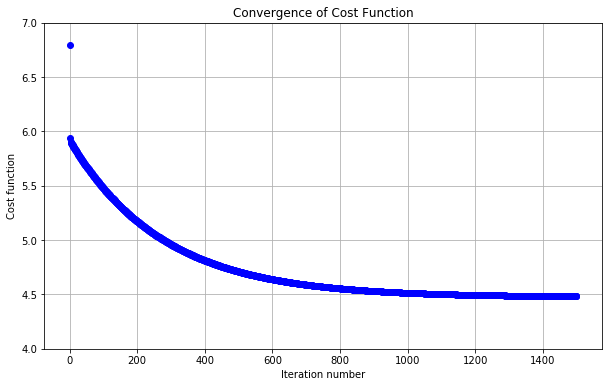

In [87]:
#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = gradientDecent(X,y,initial_theta)

#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


plotConvergence(jvec)
dummy = plt.ylim([4,7])

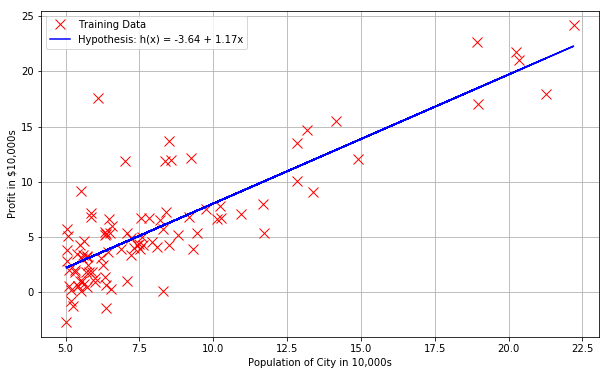

In [88]:
#Plot the line on top of the data to ensure it looks correct
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()